# Assignment 01

# 0 Intro

As a Chinese student, I experienced the frequently changing weather in Liverpool, which prompted me to develop the habit of checking the weather forecast on my mobile phone before going out. The weather forecast not only helps me choose the right clothes, but also allows me to better plan my daily activities. The reason for selecting the central UK cities for weather forecasting is that the climate conditions of these cities are instructive for understanding the weather patterns of Liverpool. By visualizing the weather in these cities, I hope to provide useful weather information for people living in this area to make more informed decisions. This report will detail how I used technology and data to achieve this goal.

# 1 Intermediate Code 

This part is used for the implementation and testing of each function, and the subsequent integration

## 1.1 Weather Data Collection & Show

### 1.1.1 Test OpenWeatherMap API (Whether I can get the response)

In [28]:
# Obtain weather data from the OpenWeatherMap API

import requests

API_KEY = '0505edcaeb95ae57982da7555d79d52b'
CITY = 'Liverpool'
url = f'http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}'

response = requests.get(url) 
weather_data = response.json() 
print(weather_data)

{'coord': {'lon': -2.9779, 'lat': 53.4106}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 279.86, 'feels_like': 275.48, 'temp_min': 279.25, 'temp_max': 280.45, 'pressure': 1016, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 8.23, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1709843085, 'sys': {'type': 2, 'id': 2008599, 'country': 'GB', 'sunrise': 1709793900, 'sunset': 1709834459}, 'timezone': 0, 'id': 2644210, 'name': 'Liverpool', 'cod': 200}


### 1.1.2 Analysis the Response

In [29]:
# Process all the data
city = weather_data['name']
country = weather_data['sys']['country']
weather = weather_data['weather'][0]['description']

temp = weather_data['main']['temp']
feels_like = weather_data['main']['feels_like']
temp_min = weather_data['main']['temp_min']
temp_max = weather_data['main']['temp_max']
pressure = weather_data['main']['pressure']
humidity = weather_data['main']['humidity']
visibility = weather_data['visibility']
wind_speed = weather_data['wind']['speed']
clouds = weather_data['clouds']['all']


print(f'The weather in {city}, {country} is {weather}.')
print(f'The temperature is {temp}°C, but it feels like {feels_like}°C.')
print(f'The minimum temperature is {temp_min}°C and the maximum temperature is {temp_max}°C.')
print(f'The pressure is {pressure} hPa and the humidity is {humidity}%.')
print(f'The visibility is {visibility}m and the wind speed is {wind_speed}m/s.')
print(f'The cloud cover is {clouds}%.')


The weather in Liverpool, GB is broken clouds.
The temperature is 279.86°C, but it feels like 275.48°C.
The minimum temperature is 279.25°C and the maximum temperature is 280.45°C.
The pressure is 1016 hPa and the humidity is 77%.
The visibility is 10000m and the wind speed is 8.23m/s.
The cloud cover is 75%.


### 1.1.3 Show weather data on Map using Folium and Marker widget

In [30]:
# Show the weather data on a map with folium

import folium

# Liverpool
latitude = 53.4084
longitude = -2.9916

# Create a map object
map_liverpool = folium.Map(location=[latitude, longitude], zoom_start=12)

# Create a marker with the weather data
popup_content = f"The weather in {city}, {country} is {weather}.\\n"
popup_content += f"The temperature is {temp}°C, feels like {feels_like}°C.\\n"
popup_content += f"Min temp: {temp_min}°C, Max temp: {temp_max}°C.\\n"
popup_content += f"Pressure: {pressure} hPa, Humidity: {humidity}%.\\n"
popup_content += f"Visibility: {visibility}m, Wind speed: {wind_speed}m/s.\\n"
popup_content += f"Cloud cover: {clouds}%."

folium.Marker([latitude, longitude], popup=popup_content).add_to(map_liverpool)

# Show the map
# map_liverpool # TODO: DEBUG

### 1.1.4 Test OpenWeatherMap API (Advanced: Future 5 days)

In [31]:
url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&units=metric&appid={API_KEY}'
response = requests.get(url) 
weather_data = response.json()

# 每天的天气打印一行
for day in weather_data['list']:
    print(day['dt_txt'], day['main']['temp'], day['weather'][0]['description'])

2024-03-07 21:00:00 6.69 broken clouds
2024-03-08 00:00:00 6.23 broken clouds
2024-03-08 03:00:00 5.8 broken clouds
2024-03-08 06:00:00 5.22 overcast clouds
2024-03-08 09:00:00 6.31 overcast clouds
2024-03-08 12:00:00 8.27 overcast clouds
2024-03-08 15:00:00 8.58 broken clouds
2024-03-08 18:00:00 6.61 broken clouds
2024-03-08 21:00:00 4.73 scattered clouds
2024-03-09 00:00:00 4.75 scattered clouds
2024-03-09 03:00:00 5.34 overcast clouds
2024-03-09 06:00:00 5 overcast clouds
2024-03-09 09:00:00 6.33 overcast clouds
2024-03-09 12:00:00 8.52 overcast clouds
2024-03-09 15:00:00 9.43 overcast clouds
2024-03-09 18:00:00 7.3 overcast clouds
2024-03-09 21:00:00 5.52 broken clouds
2024-03-10 00:00:00 4.6 broken clouds
2024-03-10 03:00:00 5.21 light rain
2024-03-10 06:00:00 6.17 light rain
2024-03-10 09:00:00 7.62 light rain
2024-03-10 12:00:00 7.55 light rain
2024-03-10 15:00:00 7.2 light rain
2024-03-10 18:00:00 6.43 light rain
2024-03-10 21:00:00 5.62 light rain
2024-03-11 00:00:00 5.28 ligh

## 1.2 Plot

### 1.2.1 Try to Print Future 5 days weather as Plot

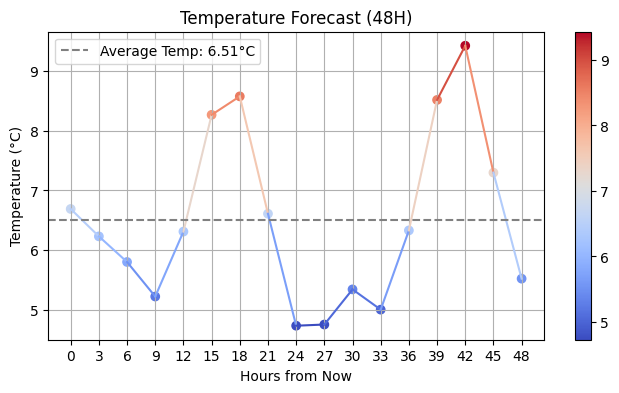

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

temperatures = [item['main']['temp'] for item in weather_data['list'][:17]]  # Use only the first 17 items (18 hours)
times = [item['dt_txt'] for item in weather_data['list'][:17]]

current_time = datetime.strptime(weather_data['list'][0]['dt_txt'], '%Y-%m-%d %H:%M:%S')

# Calculate the hours from now for each time
hours_from_now = [(datetime.strptime(t, '%Y-%m-%d %H:%M:%S') - current_time).total_seconds() / 3600 for t in times]

# Create a plot
plt.figure(figsize=(8, 4))

# Ensure the x-axis ticks are integers
plt.xticks(hours_from_now)

# Calculate the mean temperature
mean_temp = np.mean(temperatures)

# Create a color map (cmap) and a normalization (norm) for the temperatures
norm = plt.Normalize(min(temperatures), max(temperatures))
cmap = plt.get_cmap("coolwarm")

# Create a scatter plot with the temperatures
sc = plt.scatter(hours_from_now, temperatures, c=temperatures, cmap=cmap, norm=norm)

# Create a line plot connecting the temperatures
for i in range(len(temperatures) - 1):
    x_values = [hours_from_now[i], hours_from_now[i + 1]]
    y_values = [temperatures[i], temperatures[i + 1]]
    avg_temp = np.mean([temperatures[i], temperatures[i + 1]])
    color = cmap(norm(avg_temp))
    plt.plot(x_values, y_values, color=color)

# Add a color bar
cbar = plt.colorbar(sc)

# Remove the y-axis
# plt.gca().axes.get_yaxis().set_visible(False)

# Add a horizontal line for the mean temperature
plt.axhline(y=mean_temp, color='grey', linestyle='--', label=f'Average Temp: {mean_temp:.2f}°C')


plt.title('Temperature Forecast (48H)')
plt.xlabel('Hours from Now')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# Save the plot
# plt.tight_layout() # TODO: DEBUG
plt.savefig('temp_plot.png')



### 1.2.2 Add the plot into Marker

In [33]:
import base64
from folium import IFrame

# Transform the plot into a base64 string
encoded = base64.b64encode(open('temp_plot.png', 'rb').read()).decode()

# Create an IFrame with the plot
iframe = IFrame(f'<img src="data:image/png;base64,{encoded}">', width=850, height=450)

# Create a popup with the IFrame
popup = folium.Popup(iframe, max_width=2650)

# Add a marker with the popup to the map
folium.Marker([53.4084, -2.9916], popup=popup).add_to(map_liverpool)

# map_liverpool # TODO: DEBUG

## 1.3 Reading GeoJSON

In [34]:
from folium import IFrame

folium.GeoJson(
    'UK.geojson',
    name='geojson'
).add_to(map_liverpool)

map_liverpool


### 1.3.1 Trying Partition & Highlighting (With Plot Marker together)

In [35]:
import folium
import base64
from folium import IFrame, GeoJson

map_liverpool = folium.Map(location=[53.4084, -2.9916], zoom_start=6)

# Transform the plot into a base64 string
encoded = base64.b64encode(open('temp_plot.png', 'rb').read()).decode()

# Create an IFrame with the plot
iframe = IFrame(f'<img src="data:image/png;base64,{encoded}">', width=850, height=450)

# Create a popup with the IFrame
popup = folium.Popup(iframe, max_width=2650)

# Add a marker with the popup to the map
folium.Marker([53.4084, -2.9916], popup=popup).add_to(map_liverpool)

# Add GeoJSON, and define style & hightlight function
folium.GeoJson(
    'UK.geojson',
    name='geojson',
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7
    },
    highlight_function=lambda feature: {
        'fillColor': '#ff0000',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 1.0
    }
).add_to(map_liverpool)


# map_liverpool # TODO: DEBUG


## 1.4 Multi-cities

In [36]:
import folium
import base64
from folium import IFrame, GeoJson

# List all the cities and their coordinates
cities = {
    "Liverpool": [53.4084, -2.9916],
    "Leeds": [53.8008, -1.5491],
    "Sheffield": [53.3811, -1.4701],
    "Birmingham": [52.4862, -1.8904],
    "London": [51.5074, -0.1278],
    "Manchester": [53.4808, -2.2426],
    "Stafford": [52.8067, -2.1164],
    "Lincoln": [53.2344, -0.5386],
    "Worcester": [52.1920, -2.2200],
    "Gloucester": [51.8642, -2.2382],
    "Oxford": [51.7520, -1.2577],
    "St Albans": [51.7550, -0.3360],
    "Chelmsford": [51.7356, 0.4685],
    "Norwich": [52.6309, 1.2974],
    "Cambridge": [52.2053, 0.1218],
    "Warwick": [52.2823, -1.5849],
    "Northampton": [52.2405, -0.9027],
    "Buckingham": [51.9993, -0.9876],
    "Preston": [53.7632, -2.7031]
}

#  Create a map object
map_uk = folium.Map(location=[52.8, 0.2], zoom_start=8)

# Bind the Plot to Marker
encoded = base64.b64encode(open('temp_plot.png', 'rb').read()).decode()
iframe = IFrame(f'<img src="data:image/png;base64,{encoded}">', width=850, height=450)
popup = folium.Popup(iframe, max_width=2650)



# Add a marker for each city
for city, coords in cities.items():
    folium.Marker(location=coords, popup=city).add_to(map_uk)

# Add a marker with the popup to the map
folium.GeoJson(
    'UK.geojson',
    name='geojson',
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7
    },
    highlight_function=lambda feature: {
        'fillColor': '#ff0000',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 1.0
    },
    tooltip=folium.GeoJsonTooltip(fields=['name'], labels=False),
    popup=folium.GeoJsonPopup(fields=['name'])  # Pretend each county just has one city
).add_to(map_uk)


map_uk


# 2 Building a complete map

## 2.1 Encapsulating Plot Function

In [37]:
def plot_temperature_forecast(weather_data, city):
    temperatures = [item['main']['temp'] for item in weather_data['list'][:17]] # Using only the first 17 items (18 hours)
    times = [item['dt_txt'] for item in weather_data['list'][:17]]

    
    current_time = datetime.strptime(weather_data['list'][0]['dt_txt'], '%Y-%m-%d %H:%M:%S')
    hours_from_now = [(datetime.strptime(t, '%Y-%m-%d %H:%M:%S') - current_time).total_seconds() / 3600 for t in times] # Every 3 hours

    # Create a plot
    plt.figure(figsize=(8, 4))
    # Ensure the x-axis ticks are integers
    plt.xticks(hours_from_now)

    # Calculate the mean temperature
    mean_temp = np.mean(temperatures)
    
    # Create a color map (cmap) and a normalization (norm) for the temperatures
    norm = plt.Normalize(min(temperatures), max(temperatures))
    cmap = plt.get_cmap("coolwarm")

    # Plot the temperatures
    sc = plt.scatter(hours_from_now, temperatures, c=temperatures, cmap=cmap, norm=norm)

    # Plot the connecting lines
    for i in range(len(temperatures) - 1):
        x_values = [hours_from_now[i], hours_from_now[i + 1]]
        y_values = [temperatures[i], temperatures[i + 1]]
        avg_temp = np.mean([temperatures[i], temperatures[i + 1]])
        color = cmap(norm(avg_temp))
        plt.plot(x_values, y_values, color=color)

    # Plot the color bar
    cbar = plt.colorbar(sc)

    # Plot the mean temperature line
    mean_temp = np.mean(temperatures)
    plt.axhline(y=mean_temp, color='grey', linestyle='--', label=f'Average Temp: {mean_temp:.2f}°C')


    plt.title('Temperature Forecast (48H) of ' + city)
    plt.xlabel('Hours from Now')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"temp_{city}.png")
    # plt.show() # TODO: DEBUG

    return f"temp_{city}.png"


## 2.2 Encapsulate Data: City - County, Average temp, Plot

Liverpool {'county': 'Merseyside', 'mean_temp': 6.50764705882353, 'plot': 'temp_Liverpool.png'}
Leeds {'county': 'West Yorkshire', 'mean_temp': 5.52, 'plot': 'temp_Leeds.png'}
Sheffield {'county': 'South Yorkshire', 'mean_temp': 5.368235294117647, 'plot': 'temp_Sheffield.png'}
Birmingham {'county': 'West Midlands', 'mean_temp': 18.24, 'plot': 'temp_Birmingham.png'}
London {'county': 'Inner London', 'mean_temp': 7.890588235294117, 'plot': 'temp_London.png'}
Manchester {'county': 'Greater Manchester', 'mean_temp': 6.272941176470589, 'plot': 'temp_Manchester.png'}
Stafford {'county': 'Staffordshire', 'mean_temp': 5.505294117647059, 'plot': 'temp_Stafford.png'}
Lincoln {'county': 'Lincolnshire', 'mean_temp': 4.765882352941176, 'plot': 'temp_Lincoln.png'}
Worcester {'county': 'Worcestershire', 'mean_temp': 3.3823529411764706, 'plot': 'temp_Worcester.png'}
Gloucester {'county': 'Gloucestershire', 'mean_temp': 6.684705882352941, 'plot': 'temp_Gloucester.png'}
Oxford {'county': 'Oxfordshire', 

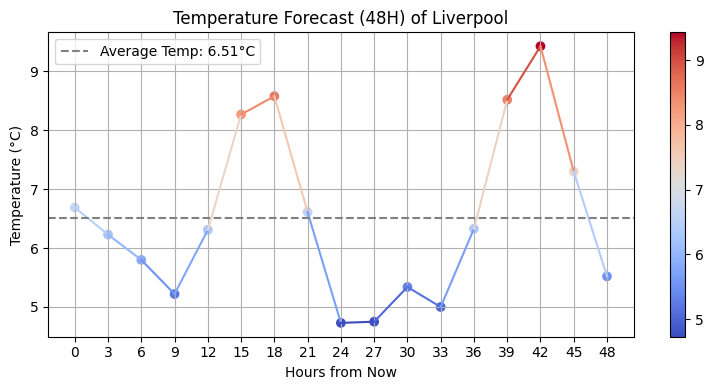

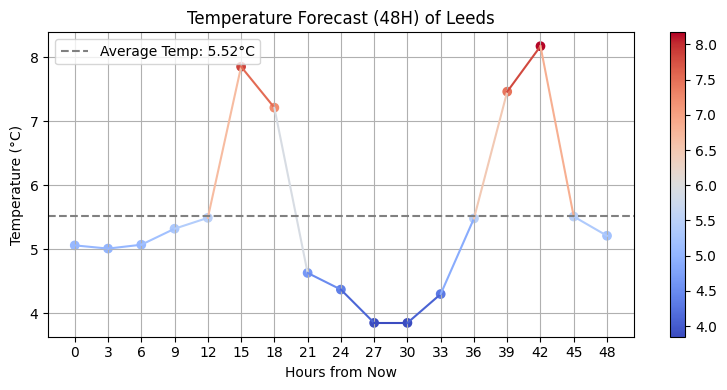

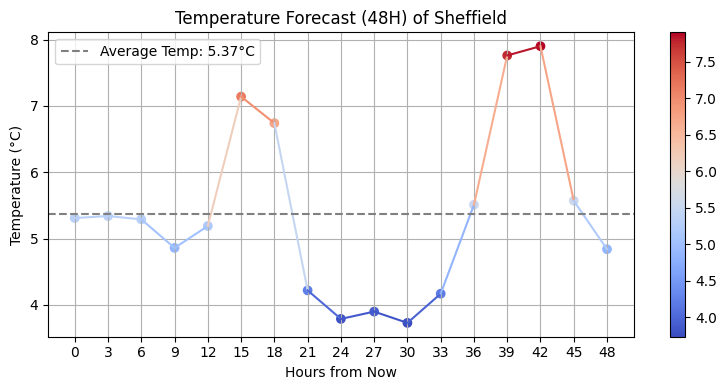

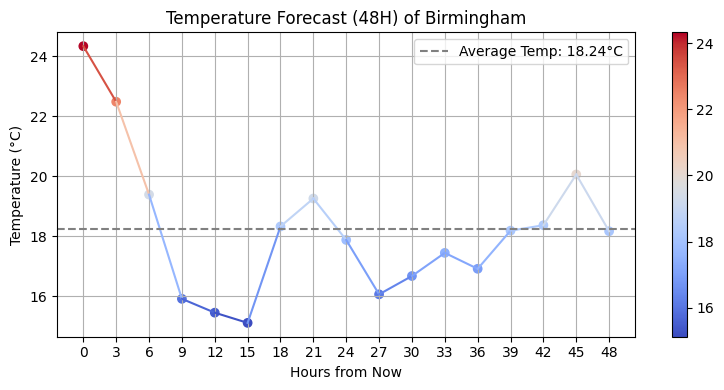

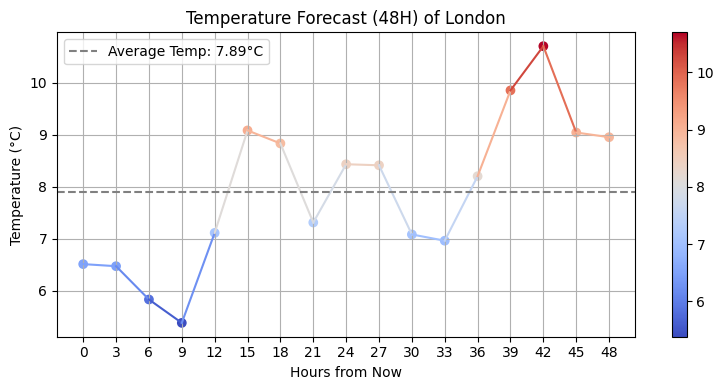

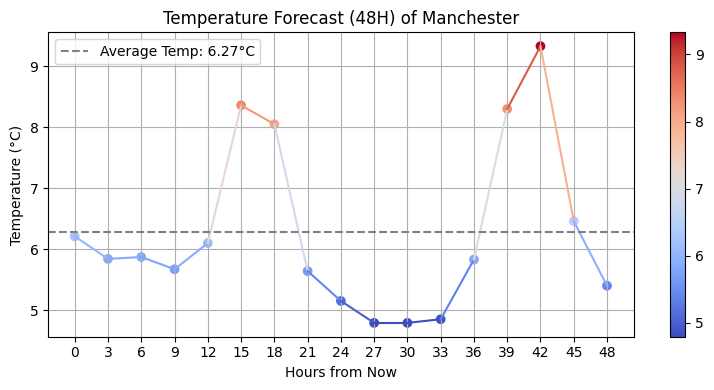

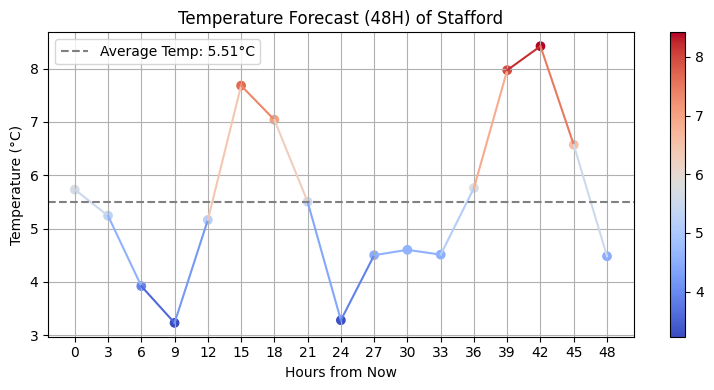

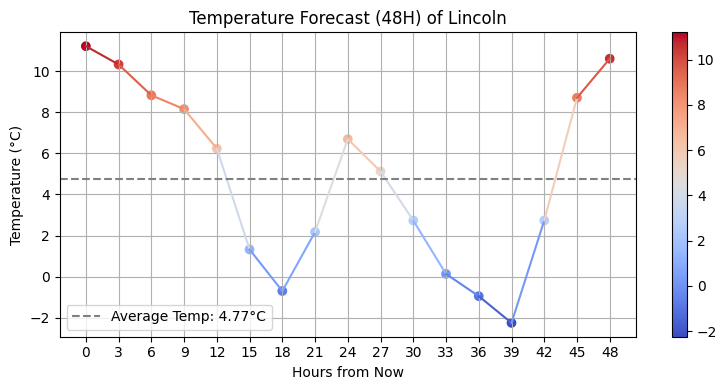

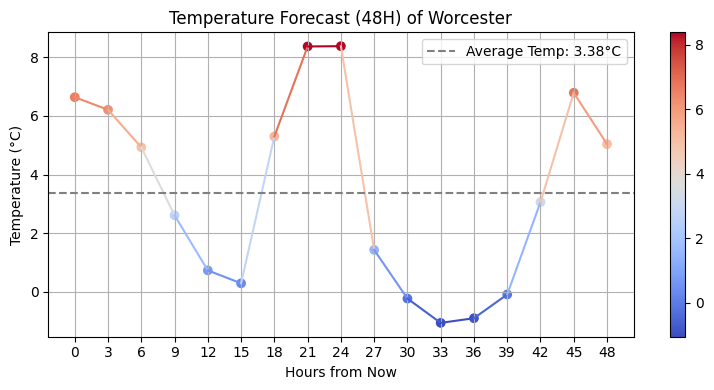

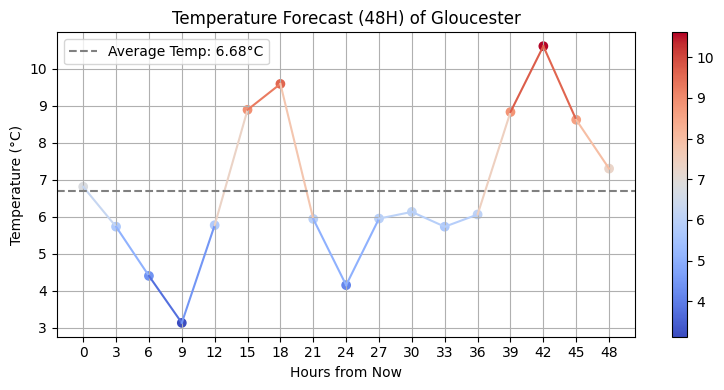

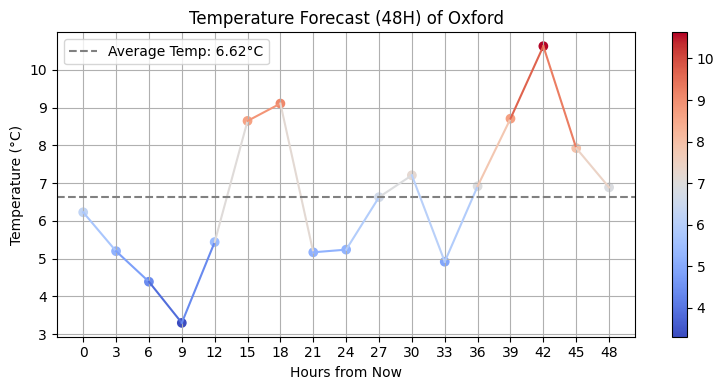

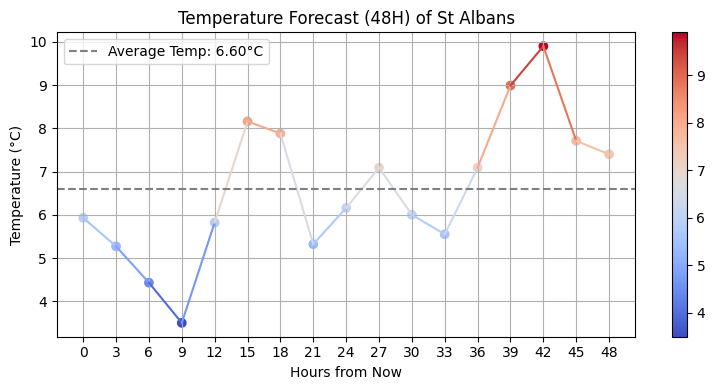

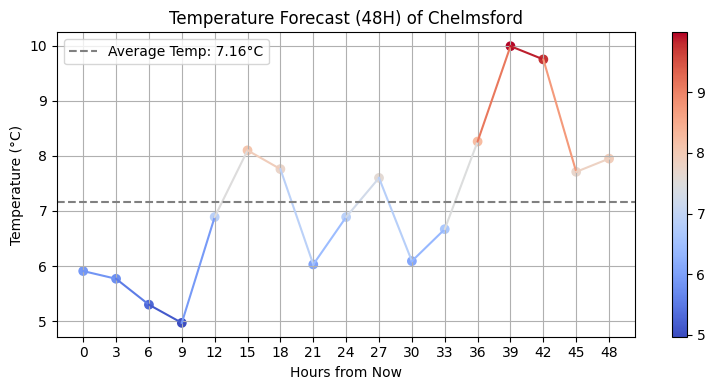

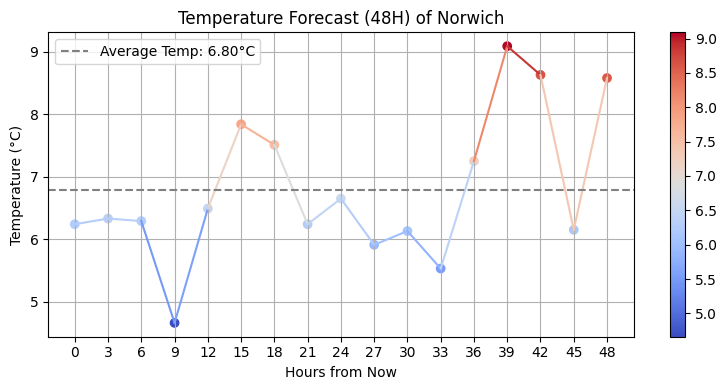

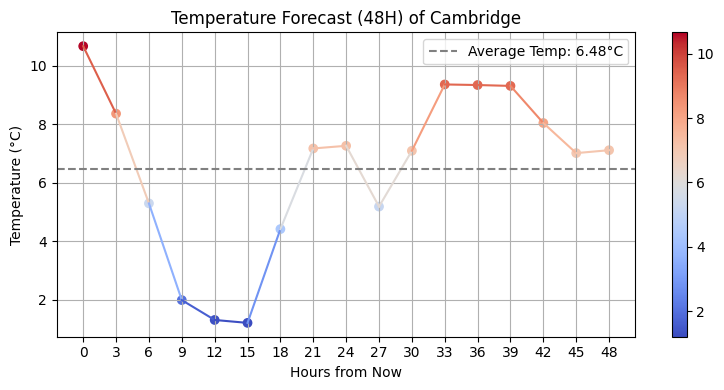

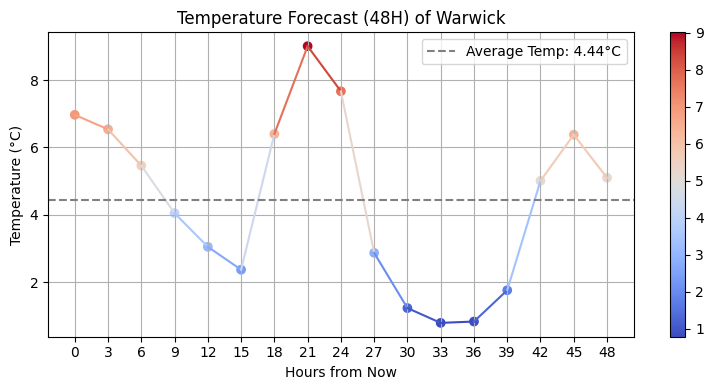

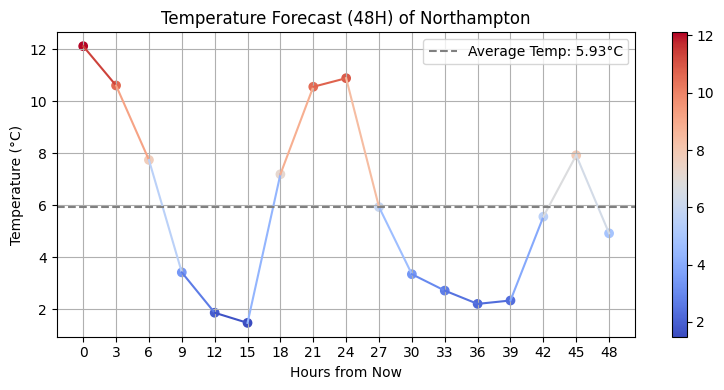

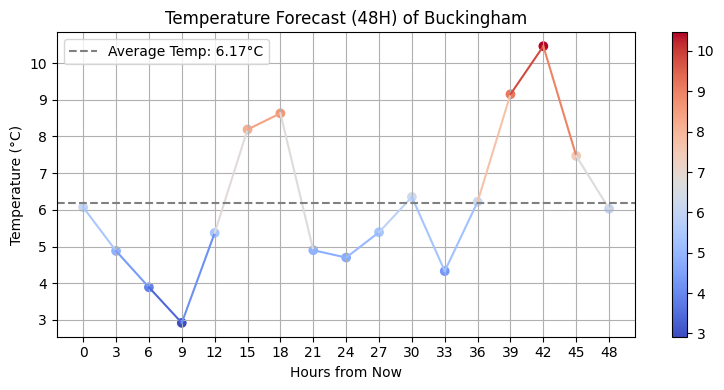

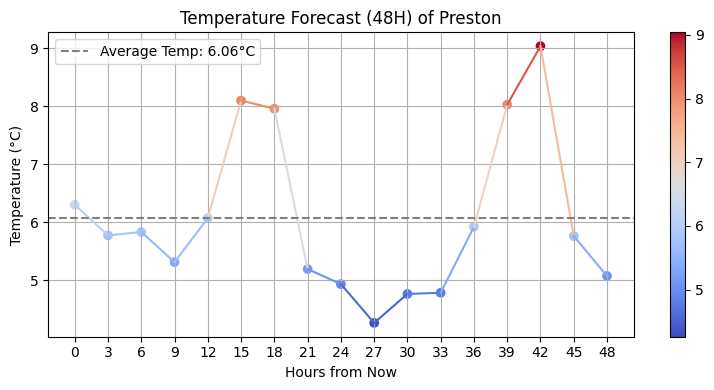

In [38]:
import requests

API_KEY = '0505edcaeb95ae57982da7555d79d52b'

# Every city's coordinates
cities = {
    "Liverpool": [53.4084, -2.9916],
    "Leeds": [53.8008, -1.5491],
    "Sheffield": [53.3811, -1.4701],
    "Birmingham": [52.4862, -1.8904],
    "London": [51.5074, -0.1278],
    "Manchester": [53.4808, -2.2426],
    "Stafford": [52.8067, -2.1164],
    "Lincoln": [53.2344, -0.5386],
    "Worcester": [52.1920, -2.2200],
    "Gloucester": [51.8642, -2.2382],
    "Oxford": [51.7520, -1.2577],
    "St Albans": [51.7550, -0.3360],
    "Chelmsford": [51.7356, 0.4685],
    "Norwich": [52.6309, 1.2974],
    "Cambridge": [52.2053, 0.1218],
    "Warwick": [52.2823, -1.5849],
    "Northampton": [52.2405, -0.9027],
    "Buckingham": [51.9993, -0.9876],
    "Preston": [53.7632, -2.7031]
}


# Every city's county
city_to_county = {
    "Liverpool": "Merseyside",
    "Leeds": "West Yorkshire",
    "Sheffield": "South Yorkshire",
    "Birmingham": "West Midlands",
    "London": "Inner London",
    "Manchester": "Greater Manchester",
    "Stafford": "Staffordshire",
    "Lincoln": "Lincolnshire",
    "Worcester": "Worcestershire",
    "Gloucester": "Gloucestershire",
    "Oxford": "Oxfordshire",
    "St Albans": "Hertfordshire",
    "Chelmsford": "Essex",
    "Norwich": "Norfolk",
    "Cambridge": "Cambridgeshire",
    "Warwick": "Warwickshire",
    "Northampton": "Northamptonshire",
    "Buckingham": "Buckinghamshire",
    "Preston": "Lancashire",
}


weather_data = {}
# Get the weather data for each city
for city in cities:
    url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&units=metric&appid={API_KEY}'
    response = requests.get(url) 
    city_weather = response.json()
    
    # Get the temperature forecast plot
    plot = plot_temperature_forecast(city_weather, city)
    
    # Calculate the mean temperature
    temperatures = [item['main']['temp'] for item in city_weather['list'][:17]]
    mean_temp = np.mean(temperatures)
    
    
    # Get the county name for the city
    county = city_to_county.get(city, "Unknown")
    
    # intergrate the data: city, county, mean_temp, plot
    weather_data[city] = {
        "county": county, 
        "mean_temp": mean_temp, 
        "plot": plot # Format: "temp_{city}.png"
    }
    
for city, data in weather_data.items():
    print(city, data)


## 2.3 Merging all the prepared Data, Building the Final Map

### 2.3.1 Define County Block color

In [39]:
# Define a function to get the color of the county
def get_color(temp, average_temps, county_temps):
    if temp == average_temps:  # Average temperature, grey
        return '#808080'
    elif temp > average_temps:  # Above average temperature, from grey to red
        red = 255
        green = int(128 - (temp - average_temps) / (max(county_temps) - average_temps) * 128) 
        blue = green # Make the color more red
    else:  # Below average temperature, from grey to blue
        blue = 255
        green = int(128 - (average_temps - temp) / (average_temps - min(county_temps)) * 128)
        red = green # Make the color more blue
    return f'#{red:02x}{green:02x}{blue:02x}'

In [40]:
# Update the style function to reflect the temperature differences
def style_function(feature, weather_data, temp, average_temps, county_temps):
    county = feature['properties']['name']
    # Get the mean temperature for the county
    temp = next((weather_data[city]['mean_temp'] for city, data in weather_data.items() if data['county'] == county), None)
    color = get_color(temp, average_temps, county_temps) if temp is not None else 'none'  # If the county is not in the weather data, don't color it
    return {
        'fillColor': color,
        'color': 'none',
        'weight': 0.5,
        'fillOpacity': 0.6
    }

### 2.3.2 Building Final Map

In [41]:
import folium
import branca
import base64
from folium import IFrame
from folium import Map
from folium.map import Html, Element, FeatureGroup, LayerControl

# Create a map object, using the Stamen Terrain style, ensure the center, active the scale bar
map_uk = folium.Map(
    location=[52.65, -0], zoom_start=8, tiles="Esri.NatGeoWorldMap", control_scale=True
)

# Add a marker for each city, and bind the plot to the marker
for city, coords in cities.items():
    # Bind the plot to the marker
    plot_path = f"temp_{city}.png"
    encoded = base64.b64encode(open(plot_path, "rb").read()).decode()
    iframe = IFrame(f'<img src="data:image/png;base64,{encoded}">', width=850, height=450)
    popup = folium.Popup(iframe, max_width=2650)
    # Add the marker to the map
    folium.Marker(location=coords, popup=popup).add_to(map_uk)


# Calculate the average temperature of all counties(cities)
county_temps = [data["mean_temp"] for data in weather_data.values()]
average_temps = np.mean(county_temps)

# Create a map that maps county names to the average temperature of their cities
county_to_temp = {data["county"]: data["mean_temp"] for city, data in weather_data.items()}


# Apply the style function to the GeoJSON layer
folium.GeoJson(
    "UK.geojson",
    name="geojson",
    style_function=lambda feature: style_function(
        feature, weather_data, temp, average_temps, county_temps 
    ),
    highlight_function=lambda feature: {
        "fillColor": "yellow",
        "color": "none",
        "weight": 0.5,
        "fillOpacity": 0.3,
    },
    tooltip=folium.GeoJsonTooltip(fields=["name"], labels=False),
).add_to(map_uk)




# Define the color scale
color_scale = branca.colormap.LinearColormap(
    ["blue", "gray", "red"],
    vmin=min(county_temps),
    vmax=max(county_temps),
    caption="Temperature Scale (Future 48H average temperature)",
)

# Add the color map to the map as a legend
map_uk.add_child(color_scale)



# Add a title to the map (with a fold/unfold button to show/hide the description)
# Using HTML, CSS to adjust the style
# Using JavaScript to control the display of the description
title_html = """
    <div style="position: absolute; top: 50px; right: 50px; background: rgba(255, 255, 255, 0); padding: 10px; z-index: 1000; border-radius: 5px;">
        <div onclick="myFunction()" style="cursor: pointer;">
            <h1 align="center" style="font-size:20px; margin-bottom: 0;">
                Temperature Forecast (48H) </br>
                [CLICK FOLD/UNFOLD] </br>
            </h1>
        </div>
        <div id="myDIV" style="display:none;">
            <p>
                </br>
                This interactive map provides a 48-hour temperature forecast </br>
                for major cities in central Great Britain. </br>
                Click on city markers for detailed projections </br>
                and refer to the color legend for county averages.
            </p>
        </div>
    </div>
    
    <script>
    function myFunction() {
        var x = document.getElementById("myDIV");
        if (x.style.display === "none") {
            x.style.display = "block";
        } else {
            x.style.display = "none";
        }
    }
    </script>
    """
map_uk.get_root().html.add_child(Element(title_html))


# Show the Final Map
map_uk

# 3 Appendix

- Missing GeoJSON data: Several counties are not shown on the map, reflecting the incompleteness of the GeoJSON data. Although TopoJSON provides more comprehensive data, its transformation process was not successful due to the large size of the data, which demonstrates the challenges when dealing with large-scale geographic data.

- Base image Selection: For the base image selection, I considered that many elements (e.g. roads, mountains, clouds) should be highlighted. I found that too much road information was distracting, while cloud maps without clear dividing lines and landmarks lacked intuitiveness.

- Plot display problem: There are white edges on the right and bottom of the plot displayed in the pop-up window. If I adjust the IFrame to make it smaller, a scroll bar will appear, affecting the aesthetics, which highlights the importance of format and design in the Web display.

- Color and temperature mapping：To calculate the specific value of the color, the average temperature of each city was first compared to the overall average temperature and the temperature values were normalized to a range of 0 to 255.  Next, a linear function is used to map the temperature difference to the color intensity, ensuring that the larger the temperature difference, the more vibrant the color. For example, for red, we can increase the value of the red channel while decreasing the values of the blue and green channels, and so on. This mapping ensures that the color changes on the map intuitively reflect the high and low temperature changes.

- Enhancing map interactivity: Adding elements such as scale, legend and collapsible title to the map aims to improve the user's interactive experience and the convenience of information access, reflecting the important role of details in map design.

